# Logistic Regression Implementation

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
df = pd.read_csv('Social_Network_Ads.csv')
df.head(2)

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19.0,19000.0,0
1,15810944,Male,35.0,20000.0,0


In [3]:
df.shape

(400, 5)

In [38]:
# Assignment:Check duplicate records
df.duplicated().sum()

0

# Problem statement: We have purchase history of 400 Customers
# We need to build a ML model to predict that customer will buy the product or not

In [5]:
# check assumptions
df.Purchased.unique()

array([0, 1])

In [6]:
# check for data balance
df.Purchased.value_counts()

0    257
1    143
Name: Purchased, dtype: int64

> 0 means not purchasing
  1 means purchasing

### check Gendrwise purchase

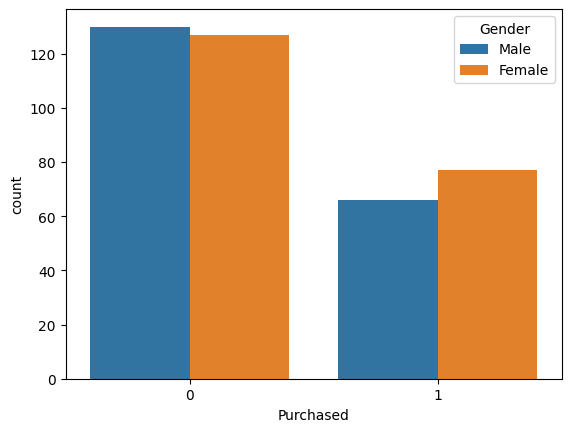

In [41]:
import seaborn as sns
sns.countplot(x=df.Purchased, data = df, hue = 'Gender')
plt.show()

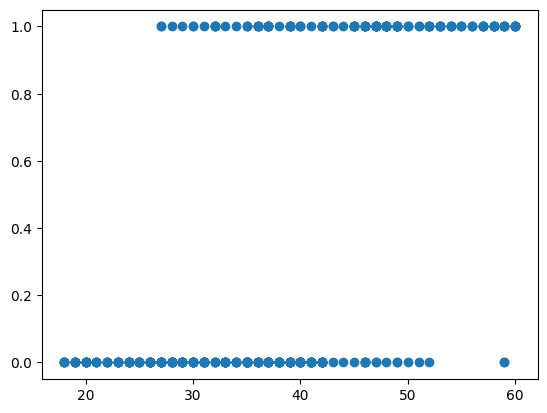

In [7]:
# check 2nd assumption
plt.scatter(df.Age,df.Purchased)

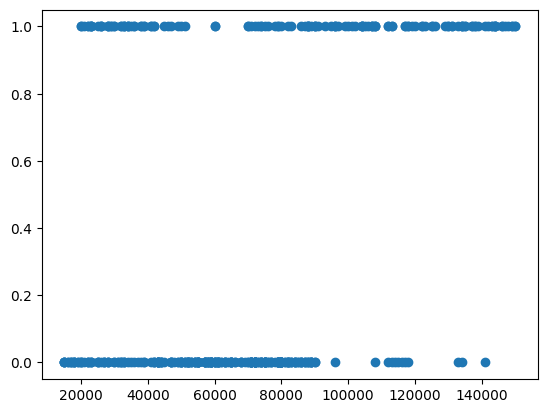

In [8]:
plt.scatter(df.EstimatedSalary,df.Purchased)

#### WIll select Age as input and Purchased as an Output

In [9]:
X = df[['Age']]
y = df.Purchased

In [10]:
X[:2]

,Age
0,19.0
1,35.0


In [11]:
y[:2]

0    0
1    0
Name: Purchased, dtype: int64

# Spliting of data

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=.2)

## Training

In [14]:
from sklearn.linear_model import LogisticRegression

In [15]:
LR = LogisticRegression()
LR

LogisticRegression()

In [16]:
# fit the model
LR.fit(X_train,y_train)

LogisticRegression()

In [17]:
# Do some mannual testing
LR.predict([[30]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([0])

In [18]:
LR.predict([[59]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([1])

In [19]:
from math import e
e

2.718281828459045

In [20]:
# y = mx+c
m = LR.coef_
m

array([[0.18613328]])

In [21]:
c = LR.intercept_
c

array([-7.87661463])

In [22]:
# now check the probability for 30 and 59
1/(1+e**(-(m*30+c)))

array([[0.09173633]])

In [23]:
1/(1+e**(-(m*59+c)))

array([[0.95710874]])

In [24]:
# We can also check the +ve and -ve probablities of given input
LR.predict_proba([[30]])
# [[No_prob,YES_prob]]

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([[0.90826367, 0.09173633]])

In [25]:
1- 0.08857634

0.91142366

In [26]:
LR.predict_proba([[59]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([[0.04289126, 0.95710874]])

In [27]:
LR.predict_proba([[19],[38]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([[0.98713228, 0.01286772],
       [0.69073335, 0.30926665]])

In [28]:
LR.predict([[19],[38]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([0, 0])

### Lets do testing

In [29]:
y_pred = LR.predict(X_test)
y_pred #predicted result

array([0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0])

In [30]:
y_test.values # actual result

array([0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0])

### Check Model accuracy using performance metrics

In [31]:
from sklearn.metrics import confusion_matrix

In [32]:
confusion_matrix(y_test,y_pred)

array([[48,  4],
       [ 4, 24]])

In [33]:
from sklearn.metrics import accuracy_score

In [34]:
accuracy_score(y_test,y_pred)*100

90.0

In [35]:
from sklearn.metrics import precision_score,recall_score,f1_score

In [36]:
display(precision_score(y_test,y_pred),recall_score(y_test,y_pred),f1_score(y_test,y_pred))

0.8571428571428571

0.8571428571428571

0.8571428571428571